<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plataforma Edulearn

In [160]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns

# Censo 2019 - IES

In [161]:
#Carregando os dados das IES
df_ies = pd.read_csv('SUP_IES_2019.CSV', sep='|', encoding='latin-1', usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF','CO_MUNICIPIO'])
df_ies.head()

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF,CO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31,3146107


In [162]:
#Renomeando as colunas
df_ies = df_ies.rename(columns={
    'CO_IES':'CODIGO_IES',
    'NO_IES':'NOME_IES',
    'SG_IES':'SIGLA_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TIPO_CATEGORIA_ADM',
    'TP_ORGANIZACAO_ACADEMICA':'TIPO_ORG_ACADEMICA',
    'CO_REGIAO':'REGIAO',
    'CO_UF':'UF',
    'CO_MUNICIPIO':'CODIGO_MUNICIPIO'
})
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31,3146107


In [163]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,Minas Gerais,3146107


In [164]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'REGIAO':str})
df_ies.REGIAO = df_ies.REGIAO.map(regiao)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,Sudeste,Minas Gerais,3146107


In [165]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_ies.TIPO_CATEGORIA_ADM = df_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,1,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,1,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,1,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,1,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,1,Sudeste,Minas Gerais,3146107


In [166]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',                               
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'TIPO_ORG_ACADEMICA':str})
df_ies.TIPO_ORG_ACADEMICA = df_ies.TIPO_ORG_ACADEMICA.map(org_academica)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,Universidade,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,Universidade,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,Universidade,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,Universidade,Sudeste,Minas Gerais,3146107


## Censo 2019 - Cursos

In [167]:
df_curso = pd.read_csv('SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['CO_IES','CO_CURSO','NO_CURSO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA'])
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,1,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,1,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,1,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,1,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,1,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [168]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [169]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'TP_GRAU_ACADEMICO':str})
df_curso.TP_GRAU_ACADEMICO = df_curso.TP_GRAU_ACADEMICO.map(grau_academico)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Licenciatura,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [170]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'TP_MODALIDADE_ENSINO':str})
df_curso.TP_MODALIDADE_ENSINO = df_curso.TP_MODALIDADE_ENSINO.map(modalidade)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [171]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'NO_CURSO':'NOME_CURSO',
    'TP_SITUACAO':'SITUACAO',
    'TP_GRAU_ACADEMICO':'TIPO_GRAU_ACADEMICO',
    'TP_MODALIDADE_ENSINO':'MODALIDADE_ENSINO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
})
df_curso.head()

,CODIGO_IES,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Unindo as informações das IES e dos cursos

In [172]:
df_curso = df_ies.join(df_curso.set_index('CODIGO_IES'), on='CODIGO_IES')
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Censo 2019 - Alunos deficientes

In [173]:
#Carregando os dados do Censo do Ensino Superior(2019), referentes aos alunos com deficiência
df_aluno = pd.read_csv('alunodeficiente_2019.csv', encoding='latin-1', usecols=['CO_CURSO','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_aluno.head()

,CO_CURSO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
#Quantidade de alunos deficientes no curso 1
len(df_aluno.loc[df_aluno['CO_CURSO'] == 1].index)

10

In [175]:
#Quantidade de alunos com deficiência auditiva no curso 1
len(df_aluno.loc[(df_aluno['CO_CURSO'] == 1) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 1)].index)

1

In [181]:
df_curso.drop('ALUNOS_DEFICIENTES',axis=1, inplace=True)
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Analisando a quantidade de alunos com deficiência nos cursos

In [182]:
#Inserindo colunas com quantidade de alunos deficientes em cada curso
df_curso.insert(13, 'ALUNOS_COM_DEFICIENCIA', 0)
df_curso.insert(14, 'ALUNOS_COM_DEFICIENCIA_AUDITIVA', 0)
df_curso.insert(15, 'ALUNOS_COM_DEFICIENCIA_FISICA', 0)
df_curso.insert(16, 'ALUNOS_COM_DEFICIENCIA_INTELECTUAL', 0)
df_curso.insert(17, 'ALUNOS_COM_DEFICIENCIA_MULTIPLA', 0)
df_curso.insert(18, 'ALUNOS_COM_SURDEZ', 0)
df_curso.insert(19, 'ALUNOS_COM_SURDOCEGUEIRA', 0)
df_curso.insert(20, 'ALUNOS_COM_BAIXA_VISAO', 0)
df_curso.insert(21, 'ALUNOS_COM_CEGUEIRA', 0)
df_curso.insert(22, 'ALUNOS_COM_SUPERDOTACAO', 0)
df_curso.insert(23, 'ALUNOS_COM_TGD_AUTISMO', 0)
df_curso.insert(24, 'ALUNOS_COM_TGD_SINDROME_ASPERGER', 0)
df_curso.insert(25, 'ALUNOS_COM_TGD_SINDROME_RETT', 0)
df_curso.insert(26, 'ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO', 0)
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [191]:
#Contando...
def contar_alunos_com_deficiencia(row):
  #Quantidade de alunos deficientes em cada curso
  return len(df_aluno.loc[df_aluno['CO_CURSO'] == row['CODIGO_CURSO']].index)
df_curso['ALUNOS_COM_DEFICIENCIA'] = df_curso.apply(contar_alunos_com_deficiencia, axis=1)

def contar_alunos_com_deficiencia_auditiva(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_AUDITIVA'] = df_curso.apply(contar_alunos_com_deficiencia_auditiva, axis=1)

def contar_alunos_com_deficiencia_fisica(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_FISICA'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_FISICA'] = df_curso.apply(contar_alunos_com_deficiencia_fisica, axis=1)

def contar_alunos_com_deficiencia_intelectual(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_INTELECTUAL'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_INTELECTUAL'] = df_curso.apply(contar_alunos_com_deficiencia_intelectual, axis=1)

def contar_alunos_com_deficiencia_multipla(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1)].index)
df_curso['ALUNOS_COM_DEFICIENCIA_MULTIPLA'] = df_curso.apply(contar_alunos_com_deficiencia_multipla, axis=1)

def contar_alunos_com_surdez(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_SURDEZ'] == 1)].index)
df_curso['ALUNOS_COM_SURDEZ'] = df_curso.apply(contar_alunos_com_surdez, axis=1)

def contar_alunos_com_surdocegueira(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1)].index)
df_curso['ALUNOS_COM_SURDOCEGUEIRA'] = df_curso.apply(contar_alunos_com_surdocegueira, axis=1)

def contar_alunos_com_baixa_visao(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_BAIXA_VISAO'] == 1)].index)
df_curso['ALUNOS_COM_BAIXA_VISAO'] = df_curso.apply(contar_alunos_com_baixa_visao, axis=1)

def contar_alunos_com_cegueira(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 1)].index)
df_curso['ALUNOS_COM_CEGUEIRA'] = df_curso.apply(contar_alunos_com_cegueira, axis=1)

def contar_alunos_com_superdotacao(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_DEFICIENCIA_SUPERDOTACAO'] == 1)].index)
df_curso['ALUNOS_COM_SUPERDOTACAO'] = df_curso.apply(contar_alunos_com_superdotacao, axis=1)

def contar_alunos_com_autismo(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_AUTISMO'] == 1)].index)
df_curso['ALUNOS_COM_TGD_AUTISMO'] = df_curso.apply(contar_alunos_com_autismo, axis=1)

def contar_alunos_com_sindrome_asperger(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_SINDROME_ASPERGER'] == 1)].index)
df_curso['ALUNOS_COM_TGD_SINDROME_ASPERGER'] = df_curso.apply(contar_alunos_com_sindrome_asperger, axis=1)

def contar_alunos_com_sindrome_rett(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_SINDROME_RETT'] == 1)].index)
df_curso['ALUNOS_COM_TGD_SINDROME_RETT'] = df_curso.apply(contar_alunos_com_sindrome_rett, axis=1)

def contar_alunos_com_deficiencia_auditiva(row):
  #Quantidade de alunos com deficiência auditiva em cada curso
  return len(df_aluno.loc[(df_aluno['CO_CURSO'] == row['CODIGO_CURSO']) & (df_aluno['IN_TGD_TRANSTOR_DESINTEGRATIVO'] == 1)].index)
df_curso['ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO'] = df_curso.apply(contar_alunos_com_deficiencia_auditiva, axis=1)

df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,5,1,3,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,12,2,5,0,0,0,0,2,2,0,0,1,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [193]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso['RECURSOS'] = df_curso.apply(contar_recursos, axis=1)
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,5,1,3,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,12,2,5,0,0,0,0,2,2,0,0,1,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,9.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Evolução de alunos matriculados

A partir dos dados existentes nas sinopses estatíticas (http://inep.gov.br/sinopses-estatisticas-da-educacao-superior)

In [ ]:
total_matriculados = pd.read_csv('total_matriculados.csv')
total_matriculados

,ANO,MATRICULADOS
0,2011,23250
1,2012,27143
2,2013,29034
3,2014,33377
4,2015,37927
5,2016,35891
6,2017,38272
7,2018,43633
8,2019,48520


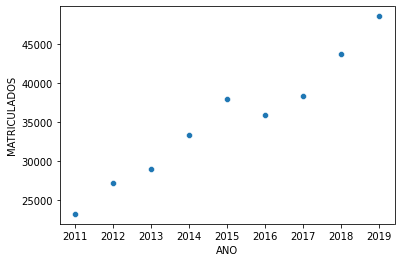

In [ ]:
#Gráfico de evolução do total de alunos
evolucao = sns.scatterplot(x='ANO', y='MATRICULADOS', data=total_matriculados)